In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
def my_pca(X, n_components=2):
    X_mean = np.mean(X, axis=0)
    B = X - X_mean
    C = np.cov(B.T)
    eigenvalues, eigenvectors = np.linalg.eig(C)
    indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, indices[:n_components]]
    transformed_X = B.dot(selected_eigenvectors)
    return transformed_X

transformed_X = my_pca(X)

In [4]:
def my_svd(X, n_components=2):
    U, S, V = np.linalg.svd(X)
    return U[:, :n_components] * S[:n_components]

transformed_X = my_svd(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

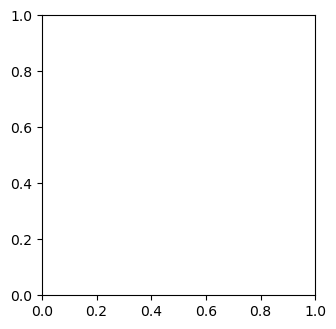

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
sns.scatterplot(transformed_X[:, 0], transformed_X[:, 1], hue=y)
plt.title('My PCA')

plt.subplot(232)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y)
plt.title('PCA from sklearn')

plt.subplot(233)
sns.scatterplot(X_svd[:, 0], X_svd[:, 1], hue=y)
plt.title('SVD from sklearn')

plt.subplot(234)
sns.scatterplot(my_svd(X)[:, 0], my_svd(X)[:, 1], hue=y)
plt.title('My SVD')

plt.show()